In [1]:
%reload_ext autoreload

%autoreload

In [2]:
#template_file = "../../test_data/unit_tests/protein_normalization/example_proteins.tsv"

template_dda = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv"
template_dia = "../../test_data/system_tests/iq_spectronaut_example_file/DIA-report-long-format.txt.spectronaut_fragion_isotopes_filtered_iq.aq_reformat.tsv"


samplenumbers_to_check = [10, 100, 1000]

In [3]:
import directlfq.benchmarking as lfq_benchmark
lfq_benchmark.LFQTimer(template_dia, list_of_samplenumbers_to_check=[500], name="DIA")

3554 prots total
using 10 processes
prot 0
prot 100
prot 200
prot 300
prot 400
prot 500
prot 600
prot 700
prot 900
prot 800
prot 1000
prot 1100
prot 1700
prot 1200
prot 1300
prot 1400
prot 1500
prot 1600
prot 1800
prot 1900
prot 2500
prot 2600
prot 2000
prot 2100
prot 2200
prot 2300
prot 2400
prot 3300
prot 2700
prot 2800
prot 3400
prot 2900
prot 3500
prot 3000
prot 3100
prot 3200


In [27]:
import directlfq.benchmarking as lfq_benchmark

timed_dda = lfq_benchmark.LFQTimer(template_dda, list_of_samplenumbers_to_check=samplenumbers_to_check, name="DDA")
timed_dia = lfq_benchmark.LFQTimer(template_dia, list_of_samplenumbers_to_check=samplenumbers_to_check, name="DIA")


using 10 processes
prot 0 of 4363
prot 800 of 4363
prot 700 of 4363
prot 400 of 4363
prot 600 of 4363
prot 900 of 4363
prot 500 of 4363
prot 300 of 4363
prot 1100 of 4363
prot 1000 of 4363
prot 100 of 4363
prot 200 of 4363
prot 1300 of 4363
prot 1200 of 4363
prot 1900 of 4363
prot 1600 of 4363
prot 1800 of 4363
prot 1500 of 4363
prot 1400 of 4363
prot 2100 of 4363
prot 2200 of 4363
prot 1700 of 4363
prot 2000 of 4363
prot 3000 of 4363
prot 2700 of 4363
prot 2300 of 4363
prot 2500 of 4363
prot 2800 of 4363
prot 2600 of 4363
prot 3100 of 4363
prot 2400 of 4363
prot 3200 of 4363
prot 3300 of 4363
prot 3600 of 4363
prot 3500 of 4363
prot 3700 of 4363
prot 3800 of 4363
prot 3900 of 4363
prot 4000 of 4363
prot 4100 of 4363
prot 4200 of 4363
prot 3400 of 4363
prot 4300 of 4363
prot 2900 of 4363
using 10 processes
prot 0 of 4363
prot 1000 of 4363
prot 900 of 4363
prot 700 of 4363
prot 800 of 4363
prot 500 of 4363
prot 600 of 4363
prot 100 of 4363
prot 400 of 4363
prot 200 of 4363
prot 1100 of 

In [28]:
#MaxQuant Runtimes
import pandas as pd


timedrun_6samples = lfq_benchmark.TimedLFQRun(pd.DataFrame(),"maxLFQ")
timedrun_6samples.num_samples =10
timedrun_6samples.runtime_info.overall_runtime = 1

timedrun_1000samples = lfq_benchmark.TimedLFQRun(pd.DataFrame(), "maxLFQ")
timedrun_1000samples.num_samples = 1000
timedrun_1000samples.runtime_info.overall_runtime = 13112+1320

timed_mq_runs = [timedrun_6samples, timedrun_1000samples]

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

class RuntimePlotter():
    def __init__(self, list_of_timed_runs , ax):
        self._ax = ax
        self._list_of_timed_runs = list_of_timed_runs
        self._plot_runtimes()
    
    def _plot_runtimes(self):
        x_values = [x.num_samples for x in self._list_of_timed_runs]
        y_values = [x.runtime_info.overall_runtime for x in self._list_of_timed_runs]
        hue = [x.name for x in self._list_of_timed_runs]
        sns.barplot(x = x_values, y = y_values, hue = hue, ax=self._ax)
        #self._ax.set_yscale("log")
        self._ax.set(xlabel="Number Proteomes", ylabel="Runtime")


[<directlfq.benchmarking.TimedLFQRun object at 0x7fa0bc532700>, <directlfq.benchmarking.TimedLFQRun object at 0x7fa0ddf97100>, <directlfq.benchmarking.TimedLFQRun object at 0x7f9efec4c640>, <directlfq.benchmarking.TimedLFQRun object at 0x7fa0dbf49f70>, <directlfq.benchmarking.TimedLFQRun object at 0x7fa0e959b040>, <directlfq.benchmarking.TimedLFQRun object at 0x7fa0bbbddb80>]


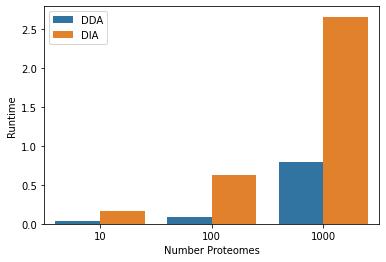

In [34]:
import matplotlib.pyplot as plt

ax = plt.subplot()
all_runs = timed_dda.timed_lfq_runs + timed_dia.timed_lfq_runs #timed_mq_runs
print(all_runs)
RuntimePlotter(all_runs, ax)

In [8]:
import pandas as pd

lfc_report = pd.read_csv("/Users/constantin/workspace/directlfq/test_data/system_tests/Spectronaut_LargeFC/re_run_SN15/20220607_153923_MP-LFC-MS1var-OT-S1-120kMS1_Report.tsv", sep = "\t")
lfc_report["fragion_id"] = lfc_report["FG.Id"].astype("str") + lfc_report["F.FrgIon"].astype("str") + lfc_report["F.FrgLossType"].astype("str") + lfc_report["F.Charge"].astype("str")

In [29]:
lfc_report.to_csv("/Users/constantin/workspace/directlfq/test_data/system_tests/Spectronaut_LargeFC/re_run_SN15/lfcreport_w_fragion_id.tsv", sep = "\t", index = None)